In [128]:
import json
import pprint
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import copy
import json
import os
from pathlib import Path

from subprocess import Popen, PIPE, STDOUT
from glob import glob

In [19]:

pp = pprint.PrettyPrinter(indent=1)

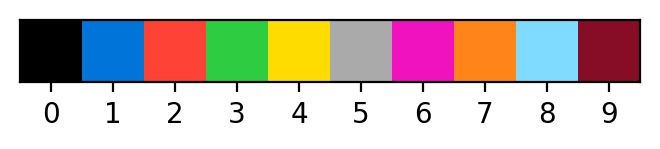

In [25]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [26]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data


def plot_task(task, task_solutions, i, t):
    """    Plots the train and test pairs of a specified task,
    using same color scheme as the ARC app    """

    num_train = len(task['train'])
    num_test = len(task['test'])

    w = num_train + num_test
    fig, axs = plt.subplots(2, w, figsize=(3 * w, 3 * 2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)

    for j in range(num_train):
        plot_one(axs[0, j], j, 'train', 'input')
        plot_one(axs[1, j], j, 'train', 'output')

    plot_one(axs[0, j + 1], 0, 'test', 'input')

    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                  '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    answer = task_solutions
    input_matrix = answer

    axs[1, j + 1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j + 1].grid(True, which='both', color='lightgrey', linewidth=0.5)
    axs[1, j + 1].set_yticks([x - 0.5 for x in range(1 + len(input_matrix))])
    axs[1, j + 1].set_xticks([x - 0.5 for x in range(1 + len(input_matrix[0]))])
    axs[1, j + 1].set_xticklabels([])
    axs[1, j + 1].set_yticklabels([])
    axs[1, j + 1].set_title('TEST OUTPUT', color='green', fontweight='bold')

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black')  # substitute 'k' for black
    fig.patch.set_facecolor('#dddddd')

    plt.tight_layout()
    plt.show()

    print()
    print()


def plot_one(ax, i, train_or_test, input_or_output):
    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                  '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)

    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x - 0.5 for x in range(1 + len(input_matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(input_matrix))])
    ax.set_title(train_or_test + ' ' + input_or_output, fontweight='bold')

In [3]:
base_path = '../data/'

In [122]:
training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path + 'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path + 'arc-agi_evaluation_solutions.json')

test_challenges = load_json(base_path + 'arc-agi_test_challenges.json')

In [ ]:
training_challenges_df = pd.DataFrame(training_challenges)

In [ ]:
training_solutions_df = pd.DataFrame(training_solutions)

In [20]:
task = training_challenges['007bbfb7']
pp.pprint(task)


{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
            'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
                       [0, 0, 0, 7, 7, 7, 7, 7, 7],
                       [0, 0, 0, 0, 7, 7, 0, 7, 7],
                       [0, 7, 7, 0, 7, 7, 0, 7, 7],
                       [7, 7, 7, 7, 7, 7, 7, 7, 7],
                       [0, 7, 7, 0, 7, 7, 0, 7, 7],
                       [0, 0, 0, 0, 7, 7, 0, 7, 7],
                       [0, 0, 0, 7, 7, 7, 7, 7, 7],
                       [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
           {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
            'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 4, 0, 0, 0, 0, 0, 4, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 4, 0, 4, 0, 0, 0

In [111]:
task = training_challenges['007bbfb7']['train'][0]
pp.pprint(task)

{'input': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
            [0, 0, 0, 7, 7, 7, 7, 7, 7],
            [0, 0, 0, 0, 7, 7, 0, 7, 7],
            [0, 7, 7, 0, 7, 7, 0, 7, 7],
            [7, 7, 7, 7, 7, 7, 7, 7, 7],
            [0, 7, 7, 0, 7, 7, 0, 7, 7],
            [0, 0, 0, 0, 7, 7, 0, 7, 7],
            [0, 0, 0, 7, 7, 7, 7, 7, 7],
            [0, 0, 0, 0, 7, 7, 0, 7, 7]]}


In [ ]:
for i in range(0, 10):
    t = list(training_challenges)[i]
    task = training_challenges[t]
    task_solution = training_solutions[t][0]
    plot_task(task, task_solution, i, t)

In [121]:
from enum import Enum


class AppendDirection(Enum):
    UP = 0
    UP_LEFT = 1
    UP_RIGHT = 2
    LEFT = 3
    RIGHT = 4
    DOWN = 5
    DOWN_LEFT = 6
    DOWN_RIGHT = 7


class Grid(object):

    def __init__(self, grid):
        self.shape = (len(grid[0]), len(grid))
        self._grid = grid

    def sub_grid(self, row_start, row_end, column_start, column_end):
        return Grid(self._grid[row_start:row_end, column_start:column_end])

    def append(self, other, direction):
        new_shape = self.shape
        if direction == AppendDirection.UP or direction == AppendDirection.DOWN:
            new_shape[0] += other.shape[0]
        elif direction == AppendDirection.UP_LEFT or direction == AppendDirection.DOWN_LEFT or direction == AppendDirection.UP_RIGHT or direction == AppendDirection.DOWN_RIGHT:
            new_shape[0] += other.shape[0]
            new_shape[1] += other.shape[1]
        elif direction == AppendDirection.LEFT or direction == AppendDirection.RIGHT:
            new_shape[1] += other.shape[1]
        new_grid = [[0 for column in range(new_shape[1])] for row in range(new_shape[0])]
        if direction == AppendDirection.UP:
            for row in range(other.shape[0]):
                for col in range(other.shape[1]):
                    new_grid[row][col] += other._grid[row][col]
            for row in range(self.shape[0]):
                for col in range(self.shape[1]):
                    new_grid[row + other.shape[0]][col] += self._grid[row][col]
        return Grid(new_grid)

    def __sub__(self, other):
        new_grid = self._grid[:][:]
        if (other.shape != self.shape):
            raise ValueError("Shapes do not match")
        else:
            for i in range(self.shape[0]):
                for j in range(self.shape[1]):
                    if other._grid[i][j] != 0:
                        new_grid[i][j] = 0
        return Grid(new_grid)

    def __add__(self, other):
        new_grid = self._grid[:][:]
        if (other.shape != self.shape):
            raise ValueError("Shapes do not match")
        else:
            for i in range(self.shape[0]):
                for j in range(self.shape[1]):
                    if other._grid[i][j] != 0:
                        self._grid[i][j] = other._grid[i][j]
        return Grid(new_grid)


class ChallengePair(object):

    def __init__(self, input, output):
        self.input_grid = Grid(input)
        self.output_grid = Grid(output)


In [123]:
cp = ChallengePair(training_challenges['007bbfb7']['train'][0]['input'], training_challenges['007bbfb7']['train'][0]['output'])

In [124]:
print(cp.input_grid.shape)
print(cp.output_grid.shape)

(3, 3)
(9, 9)


In [125]:
cp.input_grid._grid

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

In [126]:
diff = cp.input_grid - cp.input_grid

In [127]:
cp.input_grid._grid

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [118]:
diff._grid

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [119]:
diff = diff + cp.input_grid

In [120]:
diff._grid

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]